In [36]:
#kolejne wielomiany Czebyszewa 1 rodzaj
import numpy as np
def Chebyshev_Polynomials(n,x):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return 2*x*Chebyshev_Polynomials(n-1,x)-Chebyshev_Polynomials(n-2,x)



def Chebyshev_Polynomials_Iterative(n,x):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        P_0 = 1
        P_1 = x
        P_i = 0
        for i in range(2,n+1):
            P_i = 2*x*P_1-P_0
            P_0, P_1 = P_1,P_i
        
        return P_i
    
print(Chebyshev_Polynomials(10,5))
print(Chebyshev_Polynomials_Iterative(10,5))



4517251249
4517251249


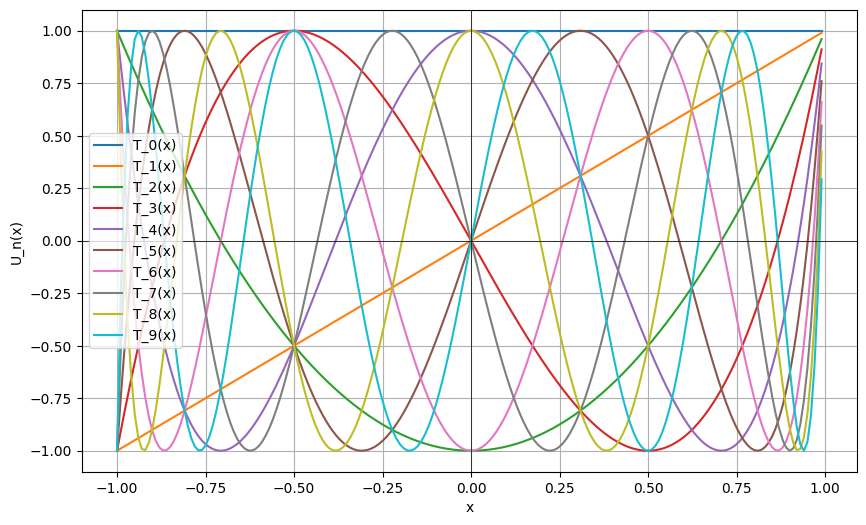

In [37]:
import matplotlib.pyplot as plt
X = np.arange(-1, 1, 0.01)

plt.figure(figsize=(10, 6))

# Rysujemy pierwsze 10 wielomianów Czebyszewa II rodzaju
for i in range(10):
    Y = [Chebyshev_Polynomials_Iterative(i, x) for x in X]
    plt.plot(X, Y, label=f'T_{i}(x)')

plt.xlabel('x')
plt.ylabel('U_n(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

In [38]:
#znajdowanie miejsc zerowych 

def Chebyshev_roots(n):
    roots = []
    for i in range(1,n+1):
        x = np.cos((2*i-1)*np.pi/(2*n))
        roots.append(x)
    return roots

In [39]:
def Chebyshev_weights(n):
    return np.pi/n

In [40]:
def Gauss_Chebyshev_Method(a, b, n, func):
    roots = np.array(Chebyshev_roots(n))
    weight = Chebyshev_weights(n)

    x_vals = 0.5 * (b - a) * roots + 0.5 * (a + b)

    fx_vals = func(x_vals)

    integral_value = weight * np.sum(fx_vals)

    print(f"Wartość całki wynosi: {integral_value}")
    return integral_value


In [41]:
import numpy as np
from scipy.integrate import quad

# Metoda Gaussa–Chebysheva I rodzaju
def Gauss_Chebyshev_Method(a, b, n, func):
    roots = np.array(Chebyshev_roots(n))
    weight = Chebyshev_weights(n)

    if a == -1 and b == 1:
        x_vals = roots
        fx_vals = func(roots)
    else:
        x_vals = 0.5 * (b - a) * roots + 0.5 * (a + b)
        fx_vals = func(x_vals)

    integral_value = weight * np.sum(fx_vals)

    #print(f"Wartość całki wynosi: {integral_value}")
    return integral_value

# Funkcje podcałkowe f(x)
def ffff(x): return 1
def f2(x): return x
def f3(x): return np.tan(x)-1 # unika ln(0)
def f4(x): return np.exp(-x)
def f5(x): return np.sin(x) * np.log(x + 2)

# Odpowiednie integrandy: f(x) * waga
def integrand1(x): return 1 / np.sqrt(1 - x**2)
def integrand2(x): return f2(x) / np.sqrt(1 - x**2)
def integrand3(x): return f3(x) / np.sqrt(x*(1-x))
def integrand4(x): return f4(x) / np.sqrt(1 - x**2)
def integrand5(x): return f5(x)  / np.sqrt((x + 1.5)*(3-x))

# Dokładne wartości całek (referencyjne)
ref1, _ = quad(integrand1, -1, 1)
ref2, _ = quad(integrand2, -1, 1)
ref3, _ = quad(integrand3, 0, 1)
ref4, _ = quad(integrand4, -1, 1)
ref5, _ = quad(integrand5, -1.5, 3)

n_values = [3, 5, 7, 9, 11, 17, 23]
n_values2 = [30,40,50,60,100,120,140,200]

# WYDRUK WYNIKÓW
print(f"f(x) = 1 / sqrt(1 - x^2) na [-1, 1], dokładna: {ref1:.16f}")
for n in n_values2:
    val = Gauss_Chebyshev_Method(-1, 1, n, ffff)
    print(f"n={n:<3} | {val:.16f}")

print(f"\n\nf(x) = x / sqrt(1 - x^2) na [-1, 1], dokładna: {ref2:.16f}")
for n in n_values:
    val = Gauss_Chebyshev_Method(-1, 1, n, f2)
    print(f"n={n:<3} | {val:.16f}")

print(f"\n\nf(x) = ln(x) / sqrt(1 - x^2) na [0, 1], dokładna: {ref3:.16f}")
for n in n_values:
    val = Gauss_Chebyshev_Method(0, 1, n, f3)
    print(f"n={n:<3} | {val:.16f}")

print(f"\n\nf(x) = e^(-x) / sqrt(1 - x^2) na [-1, 1], dokładna: {ref4:.16f}")
for n in n_values:
    val = Gauss_Chebyshev_Method(-1, 1, n, f4)
    print(f"n={n:<3} | {val:.16f}")

print(f"\n\nf(x) = sin(x) * ln(x+2) na [-1.5, 1.5], dokładna: {ref5:.16f}")
for n in n_values:
    val = Gauss_Chebyshev_Method(-1.5, 3, n, f5)
    print(f"n={n:<3} | {val:.16f}")


f(x) = 1 / sqrt(1 - x^2) na [-1, 1], dokładna: 3.1415926535895911
n=30  | 0.1047197551196598
n=40  | 0.0785398163397448
n=50  | 0.0628318530717959
n=60  | 0.0523598775598299
n=100 | 0.0314159265358979
n=120 | 0.0261799387799149
n=140 | 0.0224399475256414
n=200 | 0.0157079632679490


f(x) = x / sqrt(1 - x^2) na [-1, 1], dokładna: 0.0000000000000000
n=3   | 0.0000000000000001
n=5   | 0.0000000000000000
n=7   | 0.0000000000000001
n=9   | 0.0000000000000001
n=11  | 0.0000000000000003
n=17  | 0.0000000000000003
n=23  | 0.0000000000000001


f(x) = ln(x) / sqrt(1 - x^2) na [0, 1], dokładna: -1.0847033813263522
n=3   | -1.0862291413438239
n=5   | -1.0847091737321142
n=7   | -1.0847034031784606
n=9   | -1.0847033814088740
n=11  | -1.0847033813267775
n=17  | -1.0847033813264668
n=23  | -1.0847033813264668


f(x) = e^(-x) / sqrt(1 - x^2) na [-1, 1], dokładna: 3.9774632605061182
n=3   | 3.9773219600823158
n=5   | 3.9774632587766940
n=7   | 3.9774632605064184
n=9   | 3.9774632605064224
n=11  | 3.97